<a href="https://colab.research.google.com/github/kotiksrex/Numpy-and-Pandas/blob/lesson3_-sklearn/lesson3_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#отключение предупреждений
import warnings

warnings.filterwarnings('ignore')

#Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data = boston["data"]
feature_names = boston["feature_names"]

data.shape

X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

In [ ]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [ ]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test.head()

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280


In [ ]:
#Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics
from sklearn.metrics import r2_score
r2_score_1=r2_score(check_test["y_pred"], check_test["y_test"])
r2_score_1

0.6693702691495628

##Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [ ]:
#2. Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.e
#Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state 42
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [ ]:
#Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegres
#но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы по
#из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном м
#для аргумента y предпочтительно применение массивов вместо датафрейма.
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [ ]:
#Сделайте предсказание на тестовых данных и посчитайте R2.
y_pred = model.predict(X_test)
y_pred.shape

(152,)

In [ ]:
check_test = pd.DataFrame({
 "y_test": y_test["price"],
 "y_pred": y_pred.flatten(),
})
check_test.head(10)

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [ ]:
r2_score_2=r2_score(check_test["y_pred"], check_test["y_test"])
r2_score_2

0.8479049999699443

In [ ]:
#Сравните с результатом из предыдущего задания.
#Напишите в комментариях к коду, какая модель в данном случае работает лучше.
r2_score_1<r2_score_2
#Вывод: мдель RandomForestRegressor работает лучше, чем модель LinearRegression

True

##*Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [ ]:
#3. Вызовите документацию для класса RandomForestRegressor,
?RandomForestRegressor
#Если нам интересно узнать о том, какие признаки являются самыми важными для RF-модели
#в деле предсказания,
#мы можем визуализировать и квантифицировать показатели важности признаков,
 #обратившись к атрибуту feature_importances_:

In [ ]:
dataset = boston["data"]
feature_names = boston["feature_names"]

data = pd.DataFrame(dataset, columns=feature_names)
X = pd.DataFrame(data, columns=feature_names)
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

display(data.head())
display(data.info())
display(data.isna().sum())
display(data.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


None

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
#y_train = np.array(y_train)
import seaborn as sns
import matplotlib.pyplot as plt

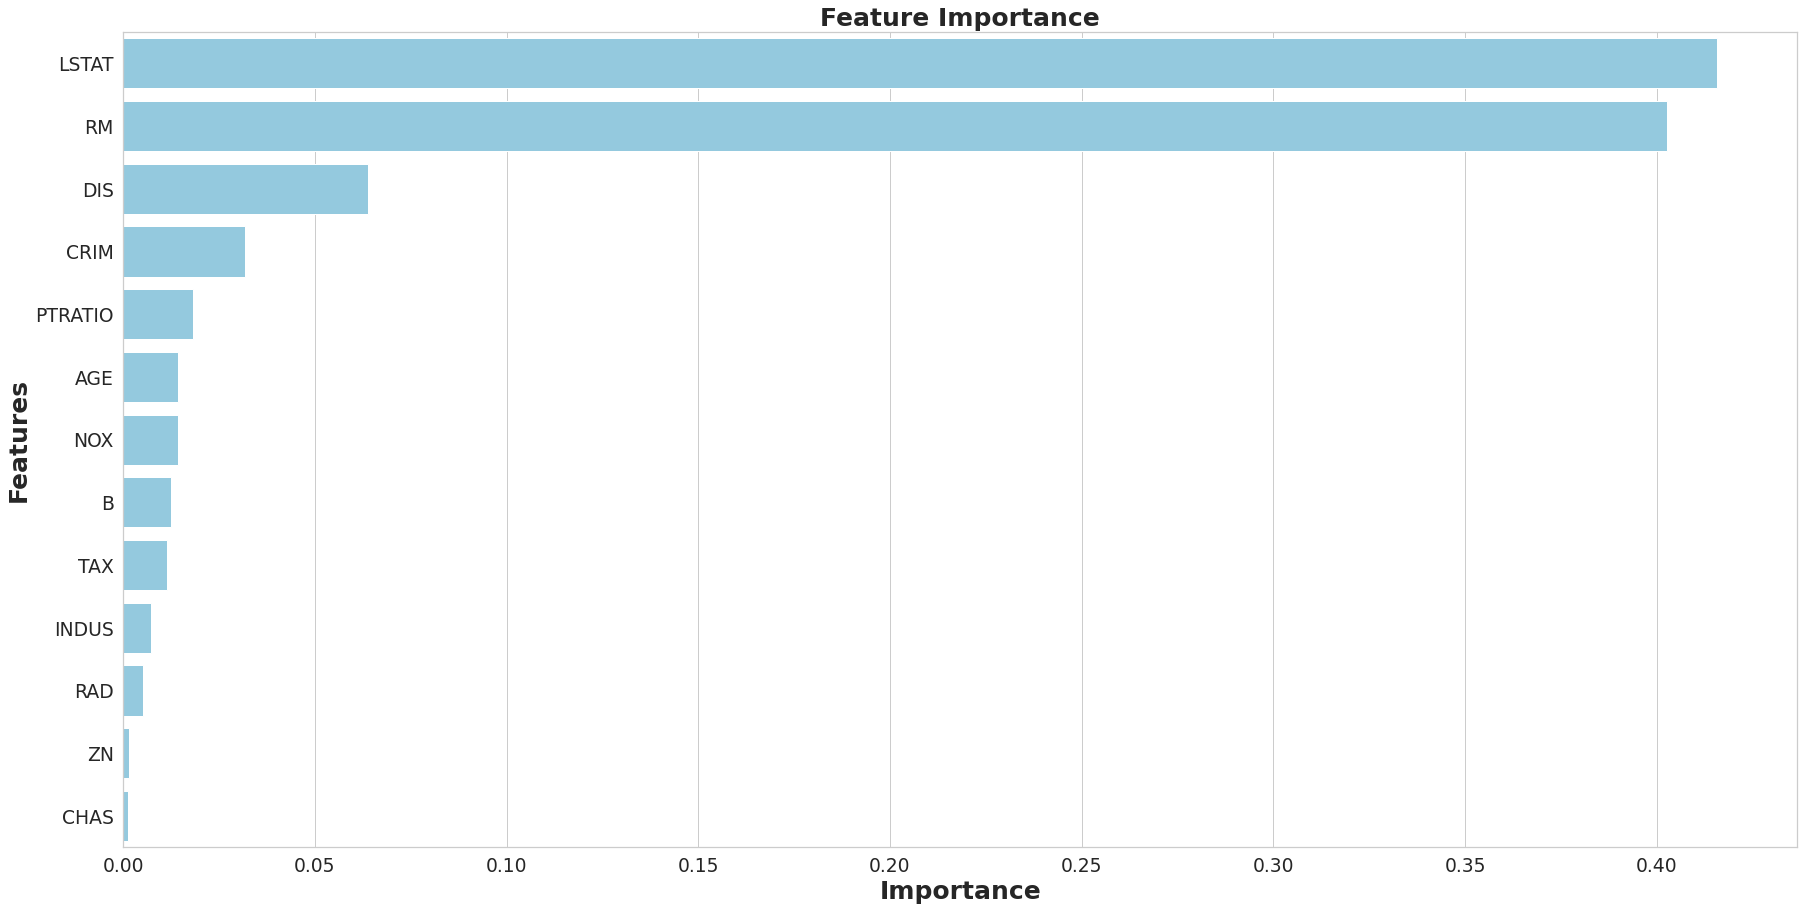

None

,Features,Importance
0,LSTAT,0.415847
1,RM,0.402682
2,DIS,0.063973
3,CRIM,0.031676
4,PTRATIO,0.018081
5,AGE,0.014299
6,NOX,0.014269
7,B,0.012451
8,TAX,0.011525
9,INDUS,0.007138


In [ ]:
feats = {}
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [ ]:
#С помощью этого атрибута найдите сумму всех показателей важности,

model.feature_importances_.sum()


1.0

#Какие два признака показывают наибольшую важность?
Для нашей RF-модели наиболее важными для предсказания являются 2 признака: LSTAT и RM.



##Задание №4 сделано в отдельном блокноте - lesson3_task4

##*Дополнительные задания:

In [ ]:
#Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_win в переменную data
#Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю
#Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.
from sklearn.datasets import load_wine
data = load_wine()
type(data)



In [ ]:
data.keys()

In [ ]:
#и создайте список data_keys, содержащий ее ключи.
data_keys=data["feature_names"]
data_keys

In [ ]:
#Просмотрите данные
data.data

In [ ]:
data.data.shape

In [ ]:
#описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста,
# без обозначений переноса строки, но с самими переносами и т.д.
print(data.DESCR)

In [ ]:
#Сколько классов содержит целевая переменная датасета?
np.unique(data["target"]).shape

In [ ]:
#Выведите названия классов.
data["target_names"]

In [ ]:
#На основе данных датасета (они содержатся в двумерном массиве Numpy)
#и названий признаков создайте датафрейм под названием X.
X = pd.DataFrame(data.data, columns=feature_names)
X.head()


In [ ]:
#Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
X.info()


In [ ]:
X.shape

In [ ]:
X.isnull().astype("int").sum()


In [ ]:
#Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.
X["target"]=data["target"].astype(np.int64)
X.info()

In [ ]:
X.head()

In [ ]:
#Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.
X_corr=X.corr()
X_corr

In [ ]:
corr_matrix = np.round(X_corr, 1)

In [ ]:
plt.figure(figsize = (17,17))
sns.set(font_scale=1.5)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm', square=True, cbar_kws= {'orientation': 'horizontal'})

plt.title('Correlation matrix')
plt.show()

In [ ]:
#Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному
#значению превышает 0.5 (причем, само поле target не должно входить в этот список).
high_corr=X_corr["target"]
high_corr=high_corr[np.abs(high_corr)>0.5].drop("target", axis=0)
high_corr=list(high_corr.index)
high_corr


In [ ]:
#Удалите из датафрейма X поле с целевой переменной.
X=X.drop("target", axis=1)
X.head()

In [ ]:
#Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2',
 #добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, 
 #а также поля с признаками из списка high_corr, возведенными в квадрат.
for feature_name in high_corr:
    X[f'{feature_name}_2'] = X.apply(lambda row: row[feature_name] ** 2, axis=1)

#for i in high_corr:
  #X[i+"_2"]=X[i]**2

In [ ]:
X.describe()